## Problem 2 [Generating Mixed Samples]
> Implement a random number generator for a random variable with the following mixture distribution:  
$$
f(x)=0.4N(-1,1)+0.6N(1,1)
$$  
> Generate N=1000 samples and histogram them. Try out a k-means clustering routine (k=2) on the data.
Turn in:
- A summary of your experiments including any relevant plots
- A brief discussions of the results
- Your code.

Suppose we have two random variables $X1 \sim N(-1,1)$, $X2 \sim N(1,1)$, our new random variable $Y$ is generated by a Bernoulli trial with $p = 0.4$. When the trial outcome is success, we choose $X1$ as our random variable $Y$, otherwise we choose $X2$.

<IPython.core.display.Javascript object>


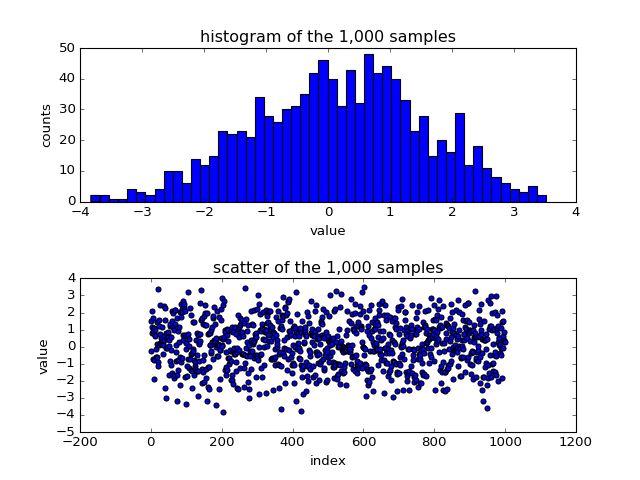

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Generate two random variables X1, X2. 
mu1, sigma1 = -1,1
mu2, sigma2 = 1,1
x1 = np.random.normal(mu1,sigma1,1000)
x2 = np.random.normal(mu2,sigma2,1000)

# Generate the Bernoulli trial result.
x3 = np.random.rand(1000) <= 0.4

# Calculate the random variable that we want.
y = x3*x1 + (1 - x3)*x2

# Plot a graph of it.
plt.figure()
plt.subplot(211)
plt.title('histogram of the 1,000 samples')
# prevent overlap between xlabel and title.
plt.subplots_adjust(hspace = 0.5)
plt.xlabel('value')
plt.ylabel('counts')
plt.hist(y, bins = 50)
plt.subplot(212)
plt.title('scatter of the 1,000 samples')
plt.xlabel('index')
plt.ylabel('value')
plt.scatter(np.arange(0,y.size),y)
plt.show()

Next, we perform k-mean clustering routine (k = 2) on it. 

<IPython.core.display.Javascript object>


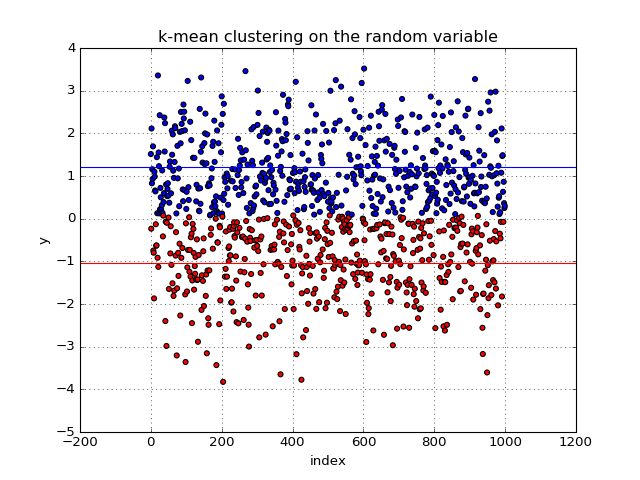

[[-1.0399794 ]
 [ 1.20751097]]


In [20]:
from sklearn.cluster import KMeans
import pandas as pd

# Perform kmean clustering.
model = KMeans(n_clusters=2)
model.fit(pd.DataFrame(y))

# Visualize the result.
colormap = np.array(['red', 'blue'])
plt.figure()
plt.scatter(np.arange(0,y.size), y, c = colormap[model.labels_])
plt.title('k-mean clustering on the random variable')
plt.axhline(model.cluster_centers_[0],c = colormap[0])
plt.axhline(model.cluster_centers_[1],c = colormap[1])
plt.xlabel('index')
plt.ylabel('y')
plt.grid()
plt.show()
print model.cluster_centers_

The blue dots and red dots denote two seperated set of data. Two lines show the kmean centers of two set of data. 